In [183]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy 
import pandas as pd
import time
import datetime
import os
from decimal import Decimal

from scipy import stats

plt.style.use('seaborn-whitegrid')
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=24

## Helper functions

In [175]:
def unpaired_observations(A: list, B: list, alpha = 0.05):
    print("==== Unpaired Observations t-Test ====\n")
    print("A = %s\n\nB = %s\n" % (str(A), str(B)))
    #print("alpha = %f\n" % alpha)

    n_a = len(A)
    n_b = len(B)

    xbar_a = sum(A) / n_a 
    xbar_b = sum(B) / n_b 

    print("Length of A: %d\nLength of B: %d" % (n_a, n_b))
    print("Average of A: %f\nAverage of B: %f" % (xbar_a, xbar_b))

    s_A = sample_standard_deviation(A, xbar_a)
    s_B = sample_standard_deviation(B, xbar_b)

    print("Sample standard deviation of A: %f\nSample standard deviation of B: %f" % (s_A, s_B)) 

    mean_difference = xbar_a - xbar_b
    std_dev_mean_diff = (((s_A ** 2) / n_a) + ((s_B ** 2) / n_b)) ** 0.5

    print("Mean difference: %f\nStandard deviation of the mean difference: %f" % (mean_difference, std_dev_mean_diff))

    degrees_of_freedom = effective_deg_freedom(s_A, n_a, s_B, n_b)
    print("Effect number of degrees of freedom: %f" % degrees_of_freedom)

    print(scipy.stats.ttest_ind(A, B, axis=0, equal_var = False))
    
    # For p < 0.05, the equivalent to Excel's TINV(0.05, 999) is stats.t.ppf(1 - 0.025, 999).
    t_stat = stats.t.ppf(1 - alpha/2, degrees_of_freedom)
    print("t statistic: %f" % t_stat)

    lower_bound_ci = mean_difference - (t_stat * std_dev_mean_diff)
    upper_bound_ci = mean_difference + (t_stat * std_dev_mean_diff)
    
    pval = stats.t.sf(np.abs(t_stat), degrees_of_freedom) * 2
    print("\n\nCI ( %f , %f ), p = %f" % (lower_bound_ci, upper_bound_ci, pval))

    if (lower_bound_ci < 0 and upper_bound_ci > 0):
        print("Interval contains 0. No conclusion can be reached.")
    else:
        print("Interval does NOT contain 0.")

    #print("\n*** ALPHA WAS SET TO %f ***" % alpha)

def sample_standard_deviation(X: list, xbar: float) -> float:
   return ( (sum([x**2 for x in X]) - (len(X) * (xbar**2))) / (len(X) - 1) )**0.5

def effective_deg_freedom(s_a: float, n_a: float, s_b: float, n_b: float) -> float:
   numerator = (((s_a ** 2)/n_a ) + ((s_b**2)/n_b))**2
   denom_left = (1 / (n_a - 1)) * ( ((s_a ** 2) / n_a) ** 2)
   denom_right = (1 / (n_b - 1)) * ( ((s_b ** 2) / n_b) ** 2)
   denom = denom_left + denom_right
   return (numerator / denom) - 2

## Set up the folders

In [162]:
FIBONACCI_ROOT = "fibonacci"
MERGESORT_ROOT = "mergesort"

WUKONG_DC_FOLDER = "wukongdc"
WUKONG2_FOLDER = "wukong2"

WUKONGDC_FIBONACCI_FILENAME = "fibonacci_%d_bench.csv"
WUKONG2_FIBONACCI_FILENAME = "wukong2_fibonacci_%d_bench.csv"

WUKONG2_MS_FILENAME = "wukong2_mergesort_%d_bench.csv"
WUKONGDC_MS_FILENAME = "mergesort_%d_bench.csv"

## Load Fibonacci data

In [163]:
fibonacci_problem_sizes = [8,12,16]

wukong2_fib_dataframes = {}
wukongdc_fib_dataframes = {}

# Wukong2 DataFrames
wukong2_directory = os.path.join(os.path.join(FIBONACCI_ROOT, WUKONG2_FOLDER))
for problem_size in fibonacci_problem_sizes:
    filename = os.path.join(wukong2_directory, WUKONG2_FIBONACCI_FILENAME % problem_size)
    df = pd.read_csv(filename)
    wukong2_fib_dataframes[problem_size] = df

# Wukong Divide-and-Conquer DataFrames
wukongdc_directory = os.path.join(os.path.join(FIBONACCI_ROOT, WUKONG_DC_FOLDER))
for problem_size in fibonacci_problem_sizes:
    filename = os.path.join(wukongdc_directory, WUKONGDC_FIBONACCI_FILENAME % problem_size)
    df = pd.read_csv(filename)
    wukongdc_fib_dataframes[problem_size] = df

## Load merge sort data

In [164]:
mergesort_problem_sizes = [100, 250, 500, 1000, 2048, 4096, 8192]

def load_merge_sort_data():
    wukong2_ms_dataframes = {}
    wukongdc_ms_dataframes = {}

    # Wukong2 DataFrames
    wukong2_directory = os.path.join(os.path.join(MERGESORT_ROOT, WUKONG2_FOLDER))
    for problem_size in mergesort_problem_sizes:
        filename = os.path.join(wukong2_directory, WUKONG2_MS_FILENAME % problem_size)
        df = pd.read_csv(filename)
        wukong2_ms_dataframes[problem_size] = df

    # Wukong Divide-and-Conquer DataFrames
    wukongdc_directory = os.path.join(os.path.join(MERGESORT_ROOT, WUKONG_DC_FOLDER))
    for problem_size in mergesort_problem_sizes:
        filename = os.path.join(wukongdc_directory, WUKONGDC_MS_FILENAME % problem_size)
        df = pd.read_csv(filename)
        wukongdc_ms_dataframes[problem_size] = df
    
    return wukong2_ms_dataframes, wukongdc_ms_dataframes

wukong2_ms_dataframes, wukongdc_ms_dataframes = load_merge_sort_data()

## Fibonacci graphs

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

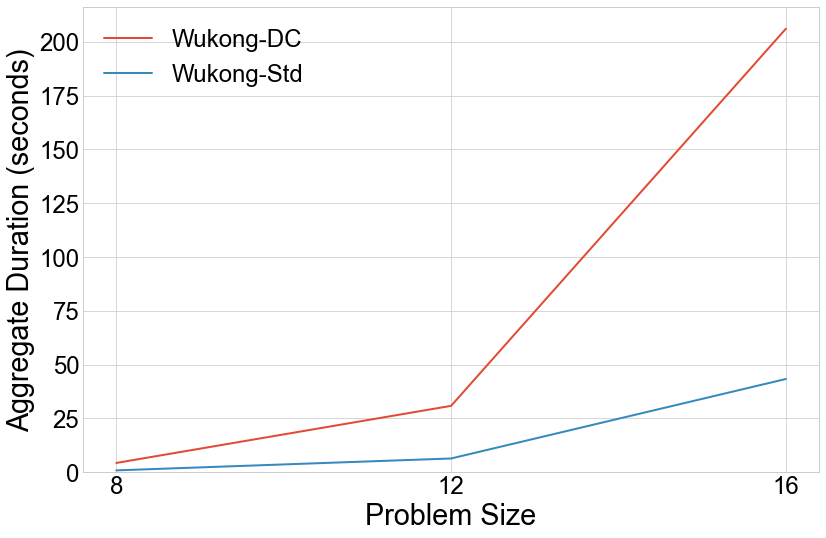

In [199]:
wukong_dc_time_averages = []
wukong2_time_averages = []
wukong_dc_cost_averages = []
wukong2_cost_averages = []
wukong_dc_num_lambdas_averages = []
wukong2_num_lambdas_averages = []
wukong_dc_agg_dur_averages = []
wukong2_agg_dur_averages = []

for problem_size in fibonacci_problem_sizes:
    wukong_dc_df = wukongdc_fib_dataframes[problem_size]
    wukong2_df = wukong2_fib_dataframes[problem_size]
    
    wukong_dc_time = wukong_dc_df["time"]
    wukong2_time = wukong2_df["time"]
    wukong_dc_cost = wukong_dc_df["cost"]
    wukong2_cost = wukong2_df["cost"]
    
    wukong_dc_num_lambdas = wukong_dc_df["num_lambdas"]
    wukong2_num_lambdas = wukong2_df["num_lambdas"]
    wukong_dc_agg_dur = wukong_dc_df["aggregate_duration"]
    wukong2_agg_dur = wukong2_df["aggregate_duration"]    
    
    wukong_dc_time_averages.append(np.mean(wukong_dc_time.values))
    wukong2_time_averages.append(np.mean(wukong2_time.values))
    wukong_dc_cost_averages.append(np.mean(wukong_dc_cost.values))
    wukong2_cost_averages.append(np.mean(wukong2_cost.values))  
    
    wukong_dc_num_lambdas_averages.append(np.mean(wukong_dc_num_lambdas.values))
    wukong2_num_lambdas_averages.append(np.mean(wukong2_num_lambdas.values))
    wukong_dc_agg_dur_averages.append(np.mean(wukong_dc_agg_dur.values))
    wukong2_agg_dur_averages.append(np.mean(wukong2_agg_dur.values))       
        
plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot([8,12,16], wukong_dc_time_averages, label = "Wukong-DC")
ax.plot([8,12,16], wukong2_time_averages, label = "Wukong-Std")
ax.set_xlabel("Problem Size")
ax.set_xticks([8,12,16])
ax.set_ylim(ymin=0)
ax.set_ylabel("Average Runtime (seconds)")
plt.tight_layout()
plt.legend()
plt.savefig("fibonacci_time.pdf")

plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot([8,12,16], wukong_dc_cost_averages, label = "Wukong-DC")
ax.plot([8,12,16], wukong2_cost_averages, label = "Wukong-Std")
ax.set_xlabel("Problem Size")
ax.set_xticks([8,12,16])
ax.set_ylim(ymin=0)
ax.set_ylabel("Average Cost (USD)")
plt.tight_layout()
plt.legend()
plt.savefig("fibonacci_cost.pdf")


plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot([8,12,16], wukong_dc_num_lambdas_averages, label = "Wukong-DC")
ax.plot([8,12,16], wukong2_num_lambdas_averages, label = "Wukong-Std")
ax.set_xlabel("Problem Size")
ax.set_xticks([8,12,16])
ax.set_ylim(ymin=0)
ax.set_ylabel("Number of Lambdas")
plt.tight_layout()
plt.legend()
plt.savefig("fibonacci_num_lambdas.pdf")

plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot([8,12,16], wukong_dc_agg_dur_averages, label = "Wukong-DC")
ax.plot([8,12,16], wukong2_agg_dur_averages, label = "Wukong-Std")
ax.set_xlabel("Problem Size")
ax.set_xticks([8,12,16])
ax.set_ylim(ymin=0)
ax.set_ylabel("Aggregate Duration (seconds)")
plt.tight_layout()
plt.legend()
plt.savefig("fibonacci_agg_dur.pdf")

## Merge Sort

C:\Users\benrc\AppData\Local\Temp/ipykernel_33384/3981604096.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([100] + mergesort_problem_sizes)
C:\Users\benrc\AppData\Local\Temp/ipykernel_33384/3981604096.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([100] + mergesort_problem_sizes)
C:\Users\benrc\AppData\Local\Temp/ipykernel_33384/3981604096.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([100] + mergesort_problem_sizes)


len(x_values): 7
len(mergesort_problem_sizes): 7
[100, 250, 500, 1000, 2048, 4096, 8192]


C:\Users\benrc\AppData\Local\Temp/ipykernel_33384/3981604096.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([100] + mergesort_problem_sizes)


<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

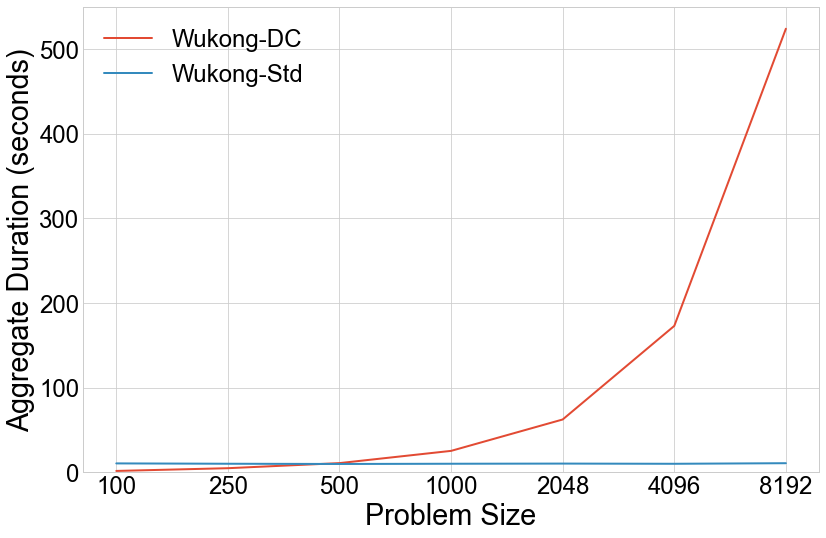

In [200]:
wukong2_ms_dataframes, wukongdc_ms_dataframes = load_merge_sort_data()

wukong_dc_time_averages = []
wukong2_time_averages = []
wukong_dc_cost_averages = []
wukong2_cost_averages = []
wukong_dc_num_lambdas_averages = []
wukong2_num_lambdas_averages = []
wukong_dc_agg_dur_averages = []
wukong2_agg_dur_averages = []

for problem_size in mergesort_problem_sizes:
    wukong_dc_df = wukongdc_ms_dataframes[problem_size]
    wukong2_df = wukong2_ms_dataframes[problem_size]
    
    wukong_dc_time = wukong_dc_df["time"]
    wukong2_time = wukong2_df["time"]
    wukong_dc_cost = wukong_dc_df["cost"]
    wukong2_cost = wukong2_df["cost"]
    
    wukong_dc_num_lambdas = wukong_dc_df["num_lambdas"]
    wukong2_num_lambdas = wukong2_df["num_lambdas"]
    wukong_dc_agg_dur = wukong_dc_df["aggregate_duration"]
    wukong2_agg_dur = wukong2_df["aggregate_duration"]    
    
    wukong_dc_time_averages.append(np.mean(wukong_dc_time.values))
    wukong2_time_averages.append(np.mean(wukong2_time.values))
    wukong_dc_cost_averages.append(np.mean(wukong_dc_cost.values))
    wukong2_cost_averages.append(np.mean(wukong2_cost.values))  
    
    wukong_dc_num_lambdas_averages.append(np.mean(wukong_dc_num_lambdas.values))
    wukong2_num_lambdas_averages.append(np.mean(wukong2_num_lambdas.values))
    wukong_dc_agg_dur_averages.append(np.mean(wukong_dc_agg_dur.values))
    wukong2_agg_dur_averages.append(np.mean(wukong2_agg_dur.values))       
        
plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
x_values = np.arange(len(mergesort_problem_sizes)) #[i+1 for i in range(len(mergesort_problem_sizes))]
ax.plot(x_values, wukong_dc_time_averages, label = "Wukong-DC")
ax.plot(x_values, wukong2_time_averages, label = "Wukong-Std")
ax.set_xlabel("Problem Size")
ax.xaxis.set_ticklabels([100] + mergesort_problem_sizes)
ax.set_ylim(ymin=0)
ax.set_ylabel("Average Runtime (seconds)")
plt.tight_layout()
plt.legend()
plt.savefig("mergesort_time.pdf")

print("len(x_values): " + str(len(x_values)))
print("len(mergesort_problem_sizes): " + str(len(mergesort_problem_sizes)))
print(mergesort_problem_sizes)

plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_values, wukong_dc_cost_averages, label = "Wukong-DC")
ax.plot(x_values, wukong2_cost_averages, label = "Wukong-Std")
ax.set_xlabel("Problem Size")
ax.xaxis.set_ticklabels([100] + mergesort_problem_sizes)
ax.set_ylim(ymin=0)
ax.set_ylabel("Average Cost (USD)")
plt.tight_layout()
plt.legend()
plt.savefig("mergesort_cost.pdf")


plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_values, wukong_dc_num_lambdas_averages, label = "Wukong-DC")
ax.plot(x_values, wukong2_num_lambdas_averages, label = "Wukong-Std")
ax.set_xlabel("Problem Size")
ax.xaxis.set_ticklabels([100] + mergesort_problem_sizes)
ax.set_ylim(ymin=0)
ax.set_ylabel("Number of Lambdas")
plt.tight_layout()
plt.legend()
plt.savefig("mergesort_num_lambdas.pdf")

plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_values, wukong_dc_agg_dur_averages, label = "Wukong-DC")
ax.plot(x_values, wukong2_agg_dur_averages, label = "Wukong-Std")
ax.set_xlabel("Problem Size")
ax.xaxis.set_ticklabels([100] + mergesort_problem_sizes)
ax.set_ylim(ymin=0)
ax.set_ylabel("Aggregate Duration (seconds)")
plt.tight_layout()
plt.legend()
plt.savefig("mergesort_agg_dur.pdf")

## Merge Sort, varying the SEQUENTIAL_THRESHOLD parameter

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
[0 1 2 3 4 5 6 7 8 9]
10
10


<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

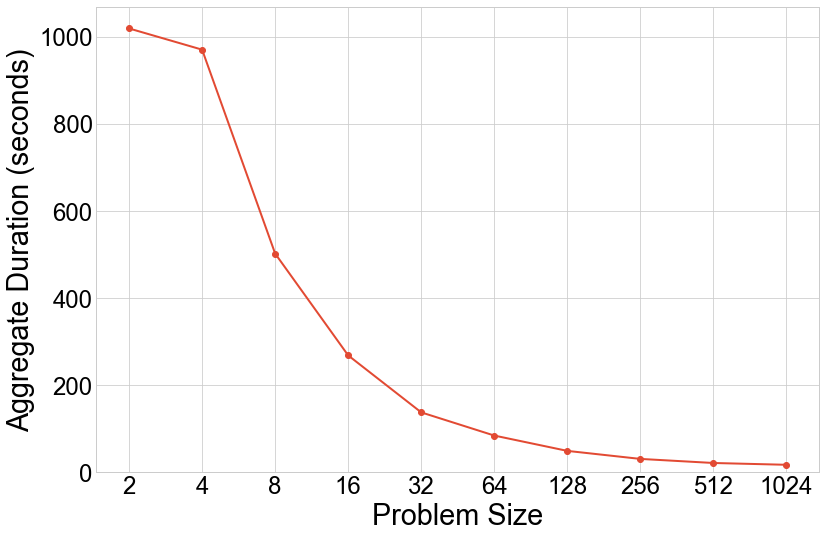

In [241]:
seq_thresh_dfs = {}
sequential_thresholds = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
directory = "wukongdc_seq_tests"
filename_base = os.path.join(MERGESORT_ROOT, directory)
filename_base = os.path.join(filename_base, "mergesort_8196_seq=%d_bench.csv")

just_times_df = pd.DataFrame()

for sequential_threshold in sequential_thresholds:
    filename = filename_base % sequential_threshold
    df = pd.read_csv(filename)
    seq_thresh_dfs[sequential_threshold] = df
    just_times_df[sequential_threshold] = df['aggregate_duration']

just_times_df.to_csv('seq_thresh_aggregate_durations.csv')
    
times, costs, num_lambdas, agg_durations = [],[],[],[]

for sequential_threshold in sequential_thresholds:
    df = seq_thresh_dfs[sequential_threshold]
    
    _times = df["time"]
    _costs = df["cost"]
    _num_lambdas = df["num_lambdas"]
    _agg_durs = df["aggregate_duration"]    
    
    times.append(np.mean(_times.values))
    costs.append(np.mean(_costs.values))
    num_lambdas.append(np.mean(_num_lambdas.values))
    agg_durations.append(np.mean(_agg_durs.values))      
        
plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
x_values = np.arange(len(sequential_thresholds))
ax.plot(x_values, times, marker = 'o')
ax.set_xlabel("Problem Size")
ax.xaxis.set_ticks(x_values)
ax.xaxis.set_ticklabels(sequential_thresholds)
ax.set_ylim(ymin=0)
ax.set_ylabel("Average Runtime (seconds)")
plt.tight_layout()
plt.savefig("mergesort_time_seq_thresh.pdf")

print(sequential_thresholds)
print(x_values)
print(len(sequential_thresholds))
print(len(x_values))

plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_values, costs, marker = 'o')
ax.set_xlabel("Problem Size")
ax.xaxis.set_ticks(x_values)
ax.xaxis.set_ticklabels(sequential_thresholds)
ax.set_ylim(ymin=0)
ax.set_ylabel("Average Cost (USD)")
plt.tight_layout()
plt.savefig("mergesort_cost_seq_thresh.pdf")


plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_values, num_lambdas, marker = 'o')
ax.set_xlabel("Problem Size")
ax.xaxis.set_ticks(x_values)
ax.xaxis.set_ticklabels(sequential_thresholds)
ax.set_ylim(ymin=0)
ax.set_ylabel("Number of Lambdas")
plt.tight_layout()
plt.savefig("mergesort_num_lambdas_seq_thresh.pdf")

plt.clf()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_values, agg_durations, marker = 'o')
ax.set_xlabel("Problem Size")
ax.xaxis.set_ticks(x_values)
ax.xaxis.set_ticklabels(sequential_thresholds)
ax.set_ylim(ymin=0)
ax.set_ylabel("Aggregate Duration (seconds)")
plt.tight_layout()
plt.savefig("mergesort_agg_dur_seq_thresh.pdf")

## Testing for statistical significance

## Independent (unpaired) samples, unequal variance - Welch's t-interval.

We are assuming unequal variance of samples. An equal variance t-test is not robust when the variances of the two populations differ. Luckily, unequal variances are robust, even in situations where the variance of the populations are in fact equal. 

In [213]:
fib_descripitive_statistics = []
fib_other_stats = []
for problem_size in fibonacci_problem_sizes:
    print("================ PROBLEM SIZE: %d ================" % problem_size)
    wukong_dc_df = wukongdc_fib_dataframes[problem_size]
    wukong2_df = wukong2_fib_dataframes[problem_size]
    
    wukong_dc_time = wukong_dc_df["time"].values
    wukong2_time = wukong2_df["time"].values
    
    # Significance level.
    alpha = 0.05
    
    # Sample sizes.
    n1, n2 = len(wukong_dc_time), len(wukong2_time)
    #print("wukong_dc_time: " + str(wukong_dc_time))
    #print("wukong2_time: " + str(wukong2_time))
    
    std1, std2 = np.std(wukong_dc_time), np.std(wukong2_time)
    
    # Sample variances.
    s1, s2 = np.var(wukong_dc_time, ddof = 1), np.var(wukong2_time, ddof = 1)
    print("s1=%s,s2=%s" % (str(s1), str(s2)))
    
    # Degrees of freedom.
    df = (s1 / n1 + s2/n2) ** 2 / ((s1 / n1) ** 2 / (n1 - 1) + (s2 / n2) ** 2 / (n2 - 1))
    print("df=" + str(df))
    
    # t-critical value for 95% CI.
    t = stats.t.ppf(1 - alpha / 2, df)
    print("t=" + str(t))
    
    # Pooled standard deviation.
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    print("s=" + str(s))
    
    lower_ci = (np.mean(wukong_dc_time) - np.mean(wukong2_time)) - t * np.sqrt((1 / n1) + (1 / n2)) * s
    upper_ci = (np.mean(wukong_dc_time) - np.mean(wukong2_time)) + t * np.sqrt((1 / n1) + (1 / n2)) * s
    
    result = stats.ttest_ind(wukong_dc_time, wukong2_time, equal_var=False)
    print("CI (%f,%f), p = %s, t = %f" % (lower_ci, upper_ci, str(result.pvalue), result.statistic))
    
    entry1 = {
        "system": "Wukong-DC",
        "n": problem_size,
        "mean": np.mean(wukong_dc_time),
        "std": std1,
        "var": s1
    }
    
    entry2 = {
        "system": "Wukong-Std",
        "n": problem_size,
        "mean": np.mean(wukong2_time),
        "std": std2,
        "var": s2
    }
    
    fib_descripitive_statistics.append(entry1)
    fib_descripitive_statistics.append(entry2)
    
    entry3 = {
        "n": str(round(problem_size, 4)),
        "p": str(round(result.pvalue, 4)),
        "CI": "[%0.3f,%0.3f]" % (lower_ci, upper_ci),
        "t-crit": str(round(t, 4)),
        "t-stat": str(round(result.statistic, 4)),
    }
    
    fib_other_stats.append(entry3)
    

df = pd.DataFrame(fib_descripitive_statistics)
df.to_csv("descripitive_statistics_fib.csv")    

df = pd.DataFrame(fib_other_stats)
df.to_csv("other_statistics_fib.csv", sep = "\t")

================ PROBLEM SIZE: 8 ================
s1=0.0036132583105502134,s2=0.0016088312951530112
df=33.12036860094361
t=2.0342344432167
s=0.05109838356397991
CI (0.601662,0.667403), p = 2.3321871058254174e-29, t = 39.268731
================ PROBLEM SIZE: 12 ================
s1=0.05715123872407883,s2=0.02190642492188542
df=31.699743418667897
t=2.03769028752454
s=0.19881859023487247
CI (-0.042007,0.214220), p = 0.1804527180901493, t = 1.369548
================ PROBLEM SIZE: 16 ================
s1=0.06557595887129676,s2=0.03719151869041193
df=35.306575140767784
t=2.0294779696551357
s=0.2266798155567768
CI (-6.649559,-6.358603), p = 1.974629823327821e-43, t = -90.734631


In [214]:
descripitive_statistics = []
ms_other_stats = []

for problem_size in mergesort_problem_sizes:
    print("================ PROBLEM SIZE: %d ================" % problem_size)
    wukong_dc_df = wukongdc_ms_dataframes[problem_size]
    wukong2_df = wukong2_ms_dataframes[problem_size]
    
    wukong_dc_time = wukong_dc_df["time"].values
    wukong2_time = wukong2_df["time"].values
    
    # Significance level.
    alpha = 0.05
    
    # Sample sizes.
    n1, n2 = len(wukong_dc_time), len(wukong2_time)
    #print("wukong_dc_time: " + str(wukong_dc_time))
    #print("wukong2_time: " + str(wukong2_time))
    
    # Sample variances.
    s1, s2 = np.var(wukong_dc_time, ddof = 1), np.var(wukong2_time, ddof = 1)
    print("s1=%s,s2=%s" % (str(s1), str(s2)))
    
    std1, std2 = np.std(wukong_dc_time), np.std(wukong2_time)
    
    # Degrees of freedom.
    df = (s1 / n1 + s2/n2) ** 2 / ((s1 / n1) ** 2 / (n1 - 1) + (s2 / n2) ** 2 / (n2 - 1))
    print("df=" + str(df))
    
    # t-critical value for 95% CI.
    t = stats.t.ppf(1 - alpha / 2, df)
    print("t=" + str(t))
    
    # Pooled standard deviation.
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    print("s=" + str(s))
    
    lower_ci = (np.mean(wukong_dc_time) - np.mean(wukong2_time)) - t * np.sqrt((1 / n1) + (1 / n2)) * s
    upper_ci = (np.mean(wukong_dc_time) - np.mean(wukong2_time)) + t * np.sqrt((1 / n1) + (1 / n2)) * s
    
    result = stats.ttest_ind(wukong_dc_time, wukong2_time, equal_var=False)
    print("CI (%f,%f), p = %s, t = %f" % (lower_ci, upper_ci, str(result.pvalue), result.statistic))
    
    entry1 = {
        "system": "Wukong-DC",
        "n": problem_size,
        "mean": np.mean(wukong_dc_time),
        "std": std1,
        "var": s1
    }
    
    entry2 = {
        "system": "Wukong-Std",
        "n": problem_size,
        "mean": np.mean(wukong2_time),
        "std": std2,
        "var": s2
    }
    
    descripitive_statistics.append(entry1)
    descripitive_statistics.append(entry2)
    
    entry3 = {
        "n": str(round(problem_size, 4)),
        "p": str(round(result.pvalue, 4)),
        "CI": "[%0.3f,%0.3f]" % (lower_ci, upper_ci),
        "t-crit": str(round(t, 4)),
        "t-stat": str(round(result.statistic, 4)),
    }
    
    ms_other_stats.append(entry3)    

df = pd.DataFrame(descripitive_statistics)
df.to_csv("descripitive_statistics_ms.csv")

df = pd.DataFrame(ms_other_stats)
df.to_csv("other_statistics_ms.csv", sep = "\t")

================ PROBLEM SIZE: 100 ================
s1=0.00805550630476127,s2=0.029165360185845635
df=28.75171425520272
t=2.0459970807316576
s=0.13642006174057925
CI (-0.849696,-0.673168), p = 5.738792175630118e-17, t = -17.650333
================ PROBLEM SIZE: 250 ================
s1=0.027660698180602322,s2=0.05590659877966018
df=34.103802625432735
t=2.0320166932073707
s=0.20441049014209436
CI (-0.491163,-0.228463), p = 3.1235195478445885e-06, t = -5.566386
================ PROBLEM SIZE: 500 ================
s1=0.02917865960239445,s2=0.01963561686137355
df=36.60113880413375
t=2.0269380474713823
s=0.15622784077072818
CI (0.077350,0.277626), p = 0.0009568098296170786, t = 3.592605
================ PROBLEM SIZE: 1000 ================
s1=0.14499880238416216,s2=0.05296018652774601
df=31.245704911433123
t=2.0388636098032094
s=0.31461006731500835
CI (0.859280,1.264966), p = 5.971239000771215e-12, t = 10.675845
================ PROBLEM SIZE: 2048 ================
s1=0.054025089463337374,s2=11

In [235]:
def compute_statistics(problem_sizes, wukongdc_dataframes = wukongdc_ms_dataframes, wukong2_dataframes = wukong2_ms_dataframes, column = "time"):
    descripitive_statistics = []
    other_stats = []
    print("COLUMN: " + str(column))

    for problem_size in problem_sizes:
        print("================ PROBLEM SIZE: %d ================" % problem_size)
        wukong_dc_df = wukongdc_dataframes[problem_size]
        wukong2_df = wukong2_dataframes[problem_size]

        wukong_dc_column = wukong_dc_df[column].values
        wukong2_column = wukong2_df[column].values

        # Significance level.
        alpha = 0.05

        # Sample sizes.
        n1, n2 = len(wukong_dc_column), len(wukong2_column)
        #print("wukong_dc_time: " + str(wukong_dc_time))
        #print("wukong2_time: " + str(wukong2_time))

        # Sample variances.
        s1, s2 = np.var(wukong_dc_column, ddof = 1), np.var(wukong2_column, ddof = 1)
        print("s1=%s,s2=%s" % (str(s1), str(s2)))

        std1, std2 = np.std(wukong_dc_column), np.std(wukong2_column)

        # Degrees of freedom.
        df = (s1 / n1 + s2/n2) ** 2 / ((s1 / n1) ** 2 / (n1 - 1) + (s2 / n2) ** 2 / (n2 - 1))
        print("df=" + str(df))

        # t-critical value for 95% CI.
        t = stats.t.ppf(1 - alpha / 2, df)
        print("t=" + str(t))
        
        print("avg1: %s, avg2: %s" % (np.mean(wukong_dc_column), np.mean(wukong2_column)))

        # Pooled standard deviation.
        s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
        print("s=" + str(s))

        lower_ci = (np.mean(wukong_dc_column) - np.mean(wukong2_column)) - t * np.sqrt((1 / n1) + (1 / n2)) * s
        upper_ci = (np.mean(wukong_dc_column) - np.mean(wukong2_column)) + t * np.sqrt((1 / n1) + (1 / n2)) * s

        result = stats.ttest_ind(wukong_dc_column, wukong2_column, equal_var=False)
        print("CI (%s,%s), p = %s, t = %f" % (lower_ci, upper_ci, str(result.pvalue), result.statistic))

        entry1 = {
            "system": "Wukong-DC",
            "n": problem_size,
            "mean": np.mean(wukong_dc_column),
            "std": std1,
            "var": s1
        }

        entry2 = {
            "system": "Wukong-Std",
            "n": problem_size,
            "mean": np.mean(wukong2_column),
            "std": std2,
            "var": s2
        }

        descripitive_statistics.append(entry1)
        descripitive_statistics.append(entry2)

        entry3 = {
            "n": str(round(problem_size, 4)),
            "p": str(round(result.pvalue, 4)),
            "CI": "[%0.3f,%0.3f]" % (lower_ci, upper_ci),
            "t-crit": str(round(t, 4)),
            "t-stat": str(round(result.statistic, 4)),
        }

        other_stats.append(entry3)
    return descripitive_statistics, other_stats

In [240]:
compute_statistics(mergesort_problem_sizes, column = "num_lambdas")

COLUMN: num_lambdas
================ PROBLEM SIZE: 100 ================
s1=0.0,s2=0.0
df=nan
t=nan
avg1: 12.0, avg2: 131.0
s=0.0
CI (nan,nan), p = 0.0, t = -inf
================ PROBLEM SIZE: 250 ================
s1=0.0,s2=0.10526315789473684
df=19.0
t=2.093024054408263
avg1: 32.0, avg2: 131.0
s=0.22941573387056177
CI (-99.15184392423822,-98.84815607576178), p = 6.914212153858773e-49, t = -1364.620826
================ PROBLEM SIZE: 500 ================
s1=0.0,s2=0.0
df=nan
t=nan
avg1: 64.0, avg2: 131.0
s=0.0
CI (nan,nan), p = 0.0, t = -inf
================ PROBLEM SIZE: 1000 ================
s1=0.0,s2=0.0
df=nan
t=nan
avg1: 128.0, avg2: 131.0
s=0.0
CI (nan,nan), p = 0.0, t = -inf
================ PROBLEM SIZE: 2048 ================
s1=0.0,s2=0.0
df=nan
t=nan
avg1: 256.0, avg2: 131.0
s=0.0
CI (nan,nan), p = 0.0, t = inf
================ PROBLEM SIZE: 4096 ================
s1=0.0,s2=0.0
df=nan
t=nan
avg1: 512.0, avg2: 131.0
s=0.0
CI (nan,nan), p = 0.0, t = inf
================ PROBLEM SI

C:\Users\benrc\AppData\Local\Temp/ipykernel_33384/1048634354.py:29: RuntimeWarning: invalid value encountered in double_scalars
  df = (s1 / n1 + s2/n2) ** 2 / ((s1 / n1) ** 2 / (n1 - 1) + (s2 / n2) ** 2 / (n2 - 1))


([{'system': 'Wukong-DC', 'n': 100, 'mean': 12.0, 'std': 0.0, 'var': 0.0},
  {'system': 'Wukong-Std', 'n': 100, 'mean': 131.0, 'std': 0.0, 'var': 0.0},
  {'system': 'Wukong-DC', 'n': 250, 'mean': 32.0, 'std': 0.0, 'var': 0.0},
  {'system': 'Wukong-Std',
   'n': 250,
   'mean': 131.0,
   'std': 0.31622776601683794,
   'var': 0.10526315789473684},
  {'system': 'Wukong-DC', 'n': 500, 'mean': 64.0, 'std': 0.0, 'var': 0.0},
  {'system': 'Wukong-Std', 'n': 500, 'mean': 131.0, 'std': 0.0, 'var': 0.0},
  {'system': 'Wukong-DC', 'n': 1000, 'mean': 128.0, 'std': 0.0, 'var': 0.0},
  {'system': 'Wukong-Std', 'n': 1000, 'mean': 131.0, 'std': 0.0, 'var': 0.0},
  {'system': 'Wukong-DC', 'n': 2048, 'mean': 256.0, 'std': 0.0, 'var': 0.0},
  {'system': 'Wukong-Std', 'n': 2048, 'mean': 131.0, 'std': 0.0, 'var': 0.0},
  {'system': 'Wukong-DC', 'n': 4096, 'mean': 512.0, 'std': 0.0, 'var': 0.0},
  {'system': 'Wukong-Std', 'n': 4096, 'mean': 131.0, 'std': 0.0, 'var': 0.0},
  {'system': 'Wukong-DC', 'n': 8192